In [1]:
# 1. Load the dataset into a pandas DataFrame. What does the data represent?
import pandas as pd
data = {
    'CustomerID': [1,2,3,4,5,6,7,8,9,10],
    'Annual Income': [15,16,17,18,19,20,21,22,23,24],
    'Spending Score': [39,81,6,77,40,76,6,94,3,72]
}

df = pd.DataFrame(data)
print(df)
#This data represents customer profiles with their income and spending score.

   CustomerID  Annual Income  Spending Score
0           1             15              39
1           2             16              81
2           3             17               6
3           4             18              77
4           5             19              40
5           6             20              76
6           7             21               6
7           8             22              94
8           9             23               3
9          10             24              72


In [3]:
#2. Select the features Annual Income and Spending Score for clustering. Why do we choose these?
X = df[['Annual Income', 'Spending Score']]
# Annual Income and Spending Score are chosen because they help group customers by earning and spending behavior

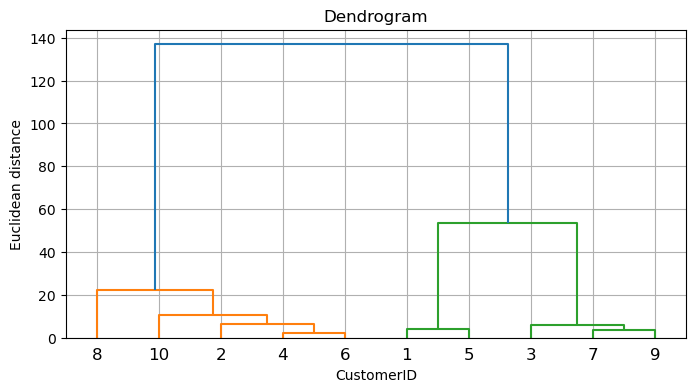

In [4]:
#3. Generate a dendrogram using scipy. What does it represent?
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X, method='ward')
plt.figure(figsize=(8,4))
dendrogram(linked, labels=df['CustomerID'].values)
plt.title('Dendrogram')
plt.xlabel('CustomerID')
plt.ylabel('Euclidean distance')
plt.grid(True)
plt.show()
#The dendrogram shows how customers cluster together based on similarity.

In [5]:
#4. How do you decide the optimal number of clusters from the dendrogram?
print("by looking at the largest vertical gap in the dendrogram (“elbow” method) to choose the number of clusters (ex: 3)")

by looking at the largest vertical gap in the dendrogram (“elbow” method) to choose the number of clusters (ex: 3)


In [6]:
#5. Apply Agglomerative Clustering with the chosen number of clusters. What are the final cluster assignments?

from sklearn.cluster import AgglomerativeClustering
n_clusters = 3 
agglo = AgglomerativeClustering(n_clusters=n_clusters)
df['Cluster'] = agglo.fit_predict(X)

In [12]:
#6. Interpret the clusters. What business insights can be derived?
print(df[['CustomerID', 'Annual Income', 'Spending Score', 'Cluster']])  # example if lowercase


print("""Cluster 0: High spending scores, varied income
Cluster 1: Very low spending scores, varied income
Cluster 2: Moderate spending and income """)

   CustomerID  Annual Income  Spending Score  Cluster
0           1             15              39        2
1           2             16              81        0
2           3             17               6        1
3           4             18              77        0
4           5             19              40        2
5           6             20              76        0
6           7             21               6        1
7           8             22              94        0
8           9             23               3        1
9          10             24              72        0
Cluster 0: High spending scores, varied income
Cluster 1: Very low spending scores, varied income
Cluster 2: Moderate spending and income 


In [13]:
for cluster in sorted(df['Cluster'].unique()):
    group = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Summary:")
    print(group[['Annual Income', 'Spending Score']].describe())


Cluster 0 Summary:
       Annual Income  Spending Score
count       5.000000        5.000000
mean       20.000000       80.000000
std         3.162278        8.455767
min        16.000000       72.000000
25%        18.000000       76.000000
50%        20.000000       77.000000
75%        22.000000       81.000000
max        24.000000       94.000000

Cluster 1 Summary:
       Annual Income  Spending Score
count       3.000000        3.000000
mean       20.333333        5.000000
std         3.055050        1.732051
min        17.000000        3.000000
25%        19.000000        4.500000
50%        21.000000        6.000000
75%        22.000000        6.000000
max        23.000000        6.000000

Cluster 2 Summary:
       Annual Income  Spending Score
count       2.000000        2.000000
mean       17.000000       39.500000
std         2.828427        0.707107
min        15.000000       39.000000
25%        16.000000       39.250000
50%        17.000000       39.500000
75%        18.0